# 1. Transformaciones Homogéneas en 2D

En gráficos por computador, las transformaciones geométricas pueden representarse
mediante matrices. Para poder representar traslaciones como multiplicación matricial,
usamos coordenadas homogéneas.

Un punto 2D:

(x, y)

Se representa en coordenadas homogéneas como:

(x, y, 1)

Esto nos permite usar matrices 3x3 para:

- Traslación
- Rotación
- Escalamiento
- Reflexión

La transformación se aplica mediante:

T @ p

Donde:
- T es la matriz de transformación
- p es el punto en coordenadas homogéneas

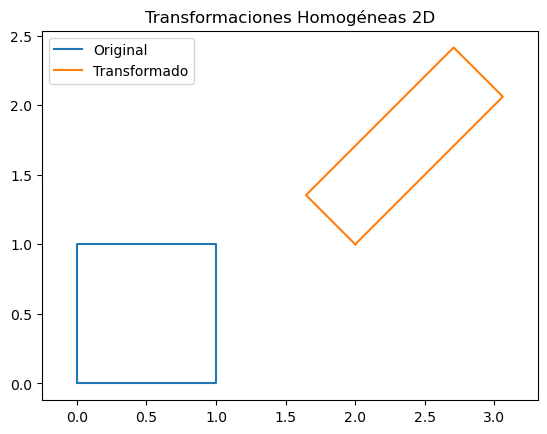

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# MATRICES DE TRANSFORMACIÓN 2D
# ==============================

def translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotation(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def scaling(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def reflection_x():
    return np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ])

# ==============================
# FIGURA ORIGINAL
# ==============================

square = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]
]).T  # Transpuesta para multiplicar matriz @ puntos

# ==============================
# APLICAR TRANSFORMACIONES
# ==============================

T = translation(2, 1)
R = rotation(np.pi/4)
S = scaling(1.5, 0.5)

# Composición (orden importa)
composed = T @ R @ S

transformed_square = composed @ square

# ==============================
# VISUALIZACIÓN
# ==============================

plt.figure()
plt.plot(square[0], square[1], label="Original")
plt.plot(transformed_square[0], transformed_square[1], label="Transformado")
plt.axis("equal")
plt.legend()
plt.title("Transformaciones Homogéneas 2D")
plt.show()

## Resultado

En la figura anterior se observa:

- La figura original (cuadrado base).
- La figura transformada luego de aplicar:
  1. Escalamiento
  2. Rotación
  3. Traslación

La transformación compuesta se construyó como:

T @ R @ S

Es importante notar que las transformaciones se aplican de derecha a izquierda.

Esto significa que primero se aplica el escalamiento,
luego la rotación,
y finalmente la traslación.

# 2. Composición de Transformaciones

Las matrices de transformación NO son conmutativas.

En general:

A @ B ≠ B @ A

En esta sección se comparan dos composiciones:

T @ R
R @ T

para demostrar que el orden altera el resultado final.

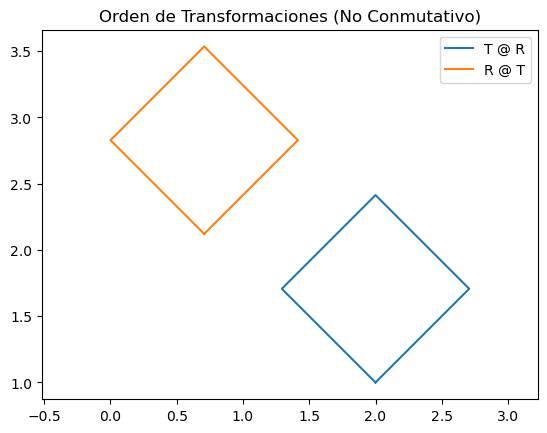

In [2]:
TR = T @ R
RT = R @ T

square_TR = TR @ square
square_RT = RT @ square

plt.figure()
plt.plot(square_TR[0], square_TR[1], label="T @ R")
plt.plot(square_RT[0], square_RT[1], label="R @ T")
plt.axis("equal")
plt.legend()
plt.title("Orden de Transformaciones (No Conmutativo)")
plt.show()

## Resultado

Se observa que aplicar:

T @ R

produce un resultado distinto que:

R @ T

Esto demuestra que la multiplicación de matrices
no es conmutativa.

En gráficos y robótica esto es crítico,
ya que el orden de aplicación de transformaciones
determina la posición final del objeto.

# 3. Transformaciones Homogéneas en 3D

En 3D los puntos se representan como:

(x, y, z, 1)

Las transformaciones se representan con matrices 4x4.

Estas matrices permiten representar:

- Traslaciones
- Rotaciones en X, Y, Z
- Escalamiento
- Reflexiones

En este ejemplo se transforma un cubo aplicando
una rotación y una traslación.

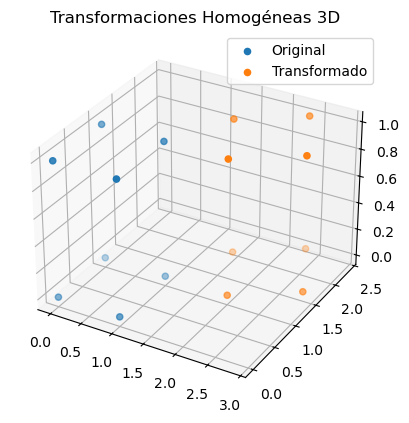

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ==============================
# MATRICES 4x4
# ==============================

def translation(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

def rotation_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta),  np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

# ==============================
# CUBO
# ==============================

cube = np.array([
    [0,0,0,1],
    [1,0,0,1],
    [1,1,0,1],
    [0,1,0,1],
    [0,0,1,1],
    [1,0,1,1],
    [1,1,1,1],
    [0,1,1,1]
]).T

T = translation(2, 1, 0)
R = rotation_z(np.pi/6)

transform = T @ R

cube_transformed = transform @ cube

# ==============================
# VISUALIZACIÓN 3D
# ==============================

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cube[0], cube[1], cube[2], label="Original")
ax.scatter(cube_transformed[0], cube_transformed[1], cube_transformed[2], label="Transformado")

ax.legend()
plt.title("Transformaciones Homogéneas 3D")
plt.show()

## Resultado

Se visualiza el cubo original y el cubo transformado.

La transformación aplicada fue:

T @ R

Primero se rota el cubo,
luego se traslada.

El uso de matrices homogéneas 4x4 permite
unificar todas las transformaciones
en una sola multiplicación matricial.

# 4. Cambios de Base

Un cambio de base permite expresar un vector
en diferentes sistemas de referencia.

Si B es una matriz cuyas columnas son
los vectores de una nueva base,
entonces:

v_E = B @ v_B

permite convertir coordenadas desde la base B
a la base estándar.

Para regresar:

v_B = B⁻¹ @ v_E

In [4]:
import numpy as np

# Nueva base (vectores columna)
B = np.array([
    [1, 1],
    [-1, 1]
])

# Punto en coordenadas base B
v_B = np.array([2, 1])

# Cambio a base estándar
v_E = B @ v_B

# Volver a base B
B_inv = np.linalg.inv(B)
v_B_rec = B_inv @ v_E

print("En base estándar:", v_E)
print("Regresando a base B:", v_B_rec)

En base estándar: [ 3 -1]
Regresando a base B: [2. 1.]


## Resultado

El vector fue expresado en:

- Base B
- Base estándar

Luego se aplicó la inversa para recuperar
las coordenadas originales.

Esto es fundamental en:

- Robótica (marcos locales vs globales)
- Gráficos (coordenadas objeto, mundo, cámara)

# 5. Aplicación en Robótica – Cinemática Directa Animada

En esta sección se implementa un brazo robótico planar de **2 grados de libertad (2 DOF)** 
utilizando transformaciones homogéneas en 2D.

Cada articulación del robot realiza:

- Una **rotación** (θ)
- Una **traslación** (longitud del eslabón)

Las transformaciones se representan mediante matrices homogéneas 3x3:

Rotación:

R(θ)

Traslación:

T(x, y)

La posición final del efector final se obtiene mediante la composición:

T_total = T1 @ T2

donde:

T1 = R(θ1) @ T(l1, 0)  
T2 = R(θ2) @ T(l2, 0)

Esta multiplicación permite transformar coordenadas desde el sistema local 
de cada articulación hasta el sistema global.

Se realiza una animación variando θ1 y θ2 en el tiempo para observar 
el movimiento dinámico del brazo robótico.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ==============================
# MATRICES HOMOGÉNEAS 2D
# ==============================

def rot(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def trans(x, y):
    return np.array([
        [1, 0, x],
        [0, 1, y],
        [0, 0, 1]
    ])

l1 = 2
l2 = 1.5

fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.set_title("Brazo Robótico 2 DOF")

line, = ax.plot([], [], 'o-', linewidth=4)

def update(frame):
    theta1 = np.sin(frame * 0.05) * np.pi/2
    theta2 = np.cos(frame * 0.05) * np.pi/2

    T1 = rot(theta1) @ trans(l1, 0)
    T2 = rot(theta2) @ trans(l2, 0)

    base = np.array([0, 0, 1])
    joint1 = T1 @ np.array([0, 0, 1])
    end_effector = T1 @ T2 @ np.array([0, 0, 1])

    x_vals = [base[0], joint1[0], end_effector[0]]
    y_vals = [base[1], joint1[1], end_effector[1]]

    line.set_data(x_vals, y_vals)
    return line,

anim = FuncAnimation(fig, update, frames=200, interval=50)

plt.close(fig) 

HTML(anim.to_jshtml())

## Resultado de la Animación

La animación muestra el movimiento continuo del brazo robótico de 2 DOF.

Observaciones importantes:

- Cada eslabón se mueve en su propio sistema de referencia local.
- Las transformaciones se aplican de derecha a izquierda.
- La composición de matrices permite modelar correctamente la cadena cinemática.

El efector final describe trayectorias suaves debido a la variación sinusoidal
de los ángulos θ1 y θ2.

Este mismo principio matemático es utilizado en:

- Robots industriales
- Animación 3D jerárquica
- Modelado de personajes
- Simulación física
- Sistemas de coordenadas en gráficos por computador

Las transformaciones homogéneas permiten unificar rotaciones y traslaciones
en una sola operación matricial, lo que simplifica el modelado de sistemas
articulados complejos.

# Conclusiones

- Las transformaciones homogéneas permiten unificar
  todas las transformaciones geométricas en multiplicaciones matriciales.
- El orden de multiplicación es fundamental.
- El cambio de base permite trabajar con múltiples marcos de referencia.
- Las cadenas cinemáticas en robótica se basan en la composición
  de transformaciones homogéneas.